In [50]:
from zipfile import ZipFile

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageEnhance
from sklearn.model_selection import train_test_split

In [3]:
with ZipFile("img/sf-captcha-recognition.zip", "r") as zip:
    zip.printdir()
    print("Extracting all the files now...")
    zip.extractall()
    print("Done!")

File Name                                             Modified             Size
data/images.npy                                2020-11-13 13:36:26    138240128
data/images_sub.npy                            2020-11-13 13:36:38    345600128
data/images_unlabeled.npy                      2020-11-13 13:37:12    691200128
data/labels.npy                                2020-11-13 13:38:08       160128
sample_submission.csv                          2020-11-13 13:38:08       419741
Extracting all the files now...
Done!


In [7]:
images = np.load("data/images.npy")
labels = np.load("data/labels.npy")

In [9]:
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, train_size=0.8, stratify=labels, random_state=42
)

In [73]:
ims = []
for i in range(100):
    im = Image.fromarray(train_images[i])
    ims.append(im)

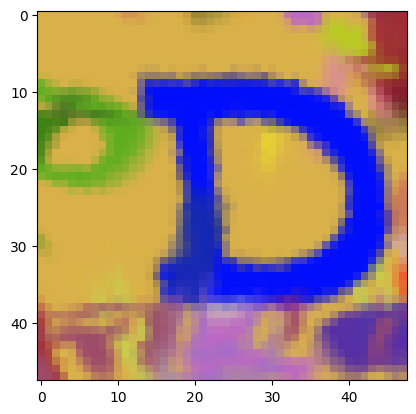

In [74]:
plt.imshow(im)

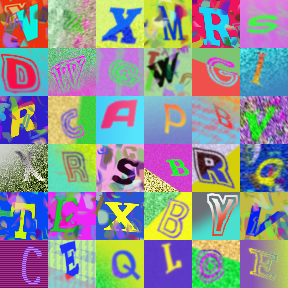

In [30]:
x = 6
y = 6
i = 0
width, height = im.size
new = Image.new("RGB", (width * x, height * y))
for w in range(0, x):
    for h in range(0, y):
        new.paste(ims[i], (width * w, height * h))
        i += 1
new

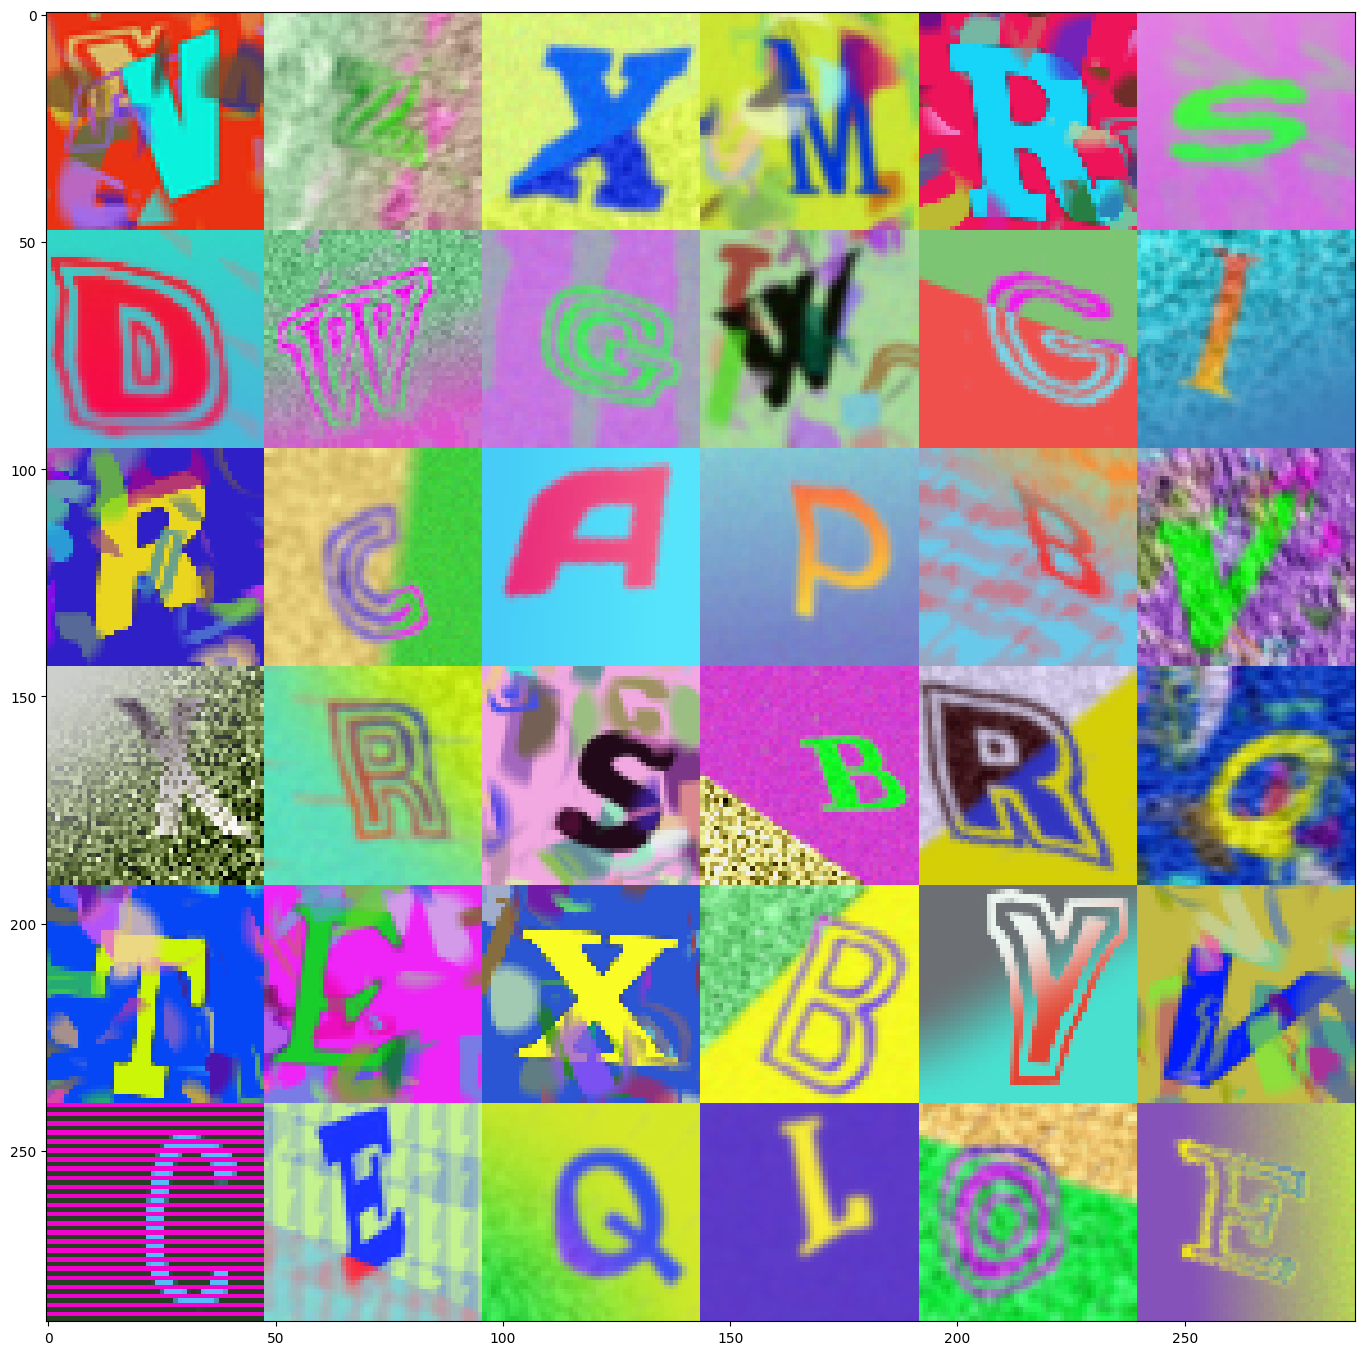

In [32]:
plt.figure(figsize=(17, 17))
plt.imshow(new)

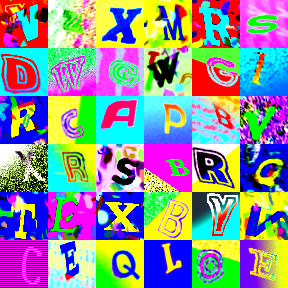

<Figure size 1700x1700 with 0 Axes>

In [65]:
enhancer = ImageEnhance.Contrast(new)
plt.figure(figsize=(17, 17))
# plt.imshow(enhancer.enhance(4))
enhanced = enhancer.enhance(3)
enhanced